# 项目公式推导
> updated: 2023-07-26
>
> 代数据计算版本

In [9]:
# 导入库
import sympy as sp
import random
import numpy as np
import roboticstoolbox as rtb
from roboticstoolbox.robot.DHLink import PrismaticDH, RevoluteDH
from spatialmath import *
import numpy as np
import math
import sympy as sp
import random
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

## 误差矩阵的推导

四轴机床的前三个坐标系采用平行假设（实际DH表示方法需要变换坐标系）

In [10]:
# 代求量——齐次变换矩阵
T_1__0 = sp.symbols("T_1^0")
T_2__1 = sp.symbols("T_2^1")
T_3__2 = sp.symbols("T_3^2")
T_4__3 = sp.symbols("T_4^3")

In [11]:
# 拖板误差量——平移和旋转
e_x1, e_y1, e_z1 = sp.symbols("\epsilon_x1 \epsilon_y1 \epsilon_z1")
e_x2, e_y2, e_z2 = sp.symbols("\epsilon_x2 \epsilon_y2 \epsilon_z2")
e_x3, e_y3, e_z3 = sp.symbols("\epsilon_x3 \epsilon_y3 \epsilon_z3")
e_x4, e_y4, e_z4 = sp.symbols("\epsilon_x4 \epsilon_y4 \epsilon_z4")

d_x1, d_y1, d_z1 = sp.symbols("\delta_x1 \delta_y1 \delta_z1")
d_x2, d_y2, d_z2 = sp.symbols("\delta_x2 \delta_y2 \delta_z2")
d_x3, d_y3, d_z3 = sp.symbols("\delta_x3 \delta_y3 \delta_z3")
d_x4, d_y4, d_z4 = sp.symbols("\delta_x4 \delta_y4 \delta_z4")

a1, b1, c1 = sp.symbols("a1 b1 c1")   # 位移量，应该是DH参数给出的
a2, b2, c2 = sp.symbols("a2 b2 c2")
a3, b3, c3 = sp.symbols("a3 b3 c3")

t_x, t_y, t_z = sp.symbols("theta_x theta_y theta_z")
p_x, p_y, p_z = sp.symbols("p_x p_y p_z")

In [12]:
# 齐次变换矩阵
T_1__0 = sp.Matrix([
    [1, -e_z1, e_y1, a1+d_x1],
    [e_z1, 1, -e_x1, b1+d_y1],
    [-e_y1, e_x1, 1, c1+d_z1],
    [0, 0, 0, 1]
])
T_2__1 = sp.Matrix([
    [1, -e_z2, e_y2, a2+d_x2],
    [e_z2, 1, -e_x2, b2+d_y2],
    [-e_y2, e_x2, 1, c2+d_z2],
    [0, 0, 0, 1]
])
T_3__2 = sp.Matrix([
    [1, -e_z3, e_y3, a3+d_x3],
    [e_z3, 1, -e_x3, b3+d_y3],
    [-e_y3, e_x3, 1, c3+d_z3],
    [0, 0, 0, 1]
])
T_4__3 = sp.Matrix([
    [sp.cos(t_z), -sp.sin(t_z), e_y4, d_x4],
    [sp.sin(t_z), sp.cos(t_z), -e_x4, d_y4],
    [e_x4*sp.sin(t_z)-e_y4*sp.cos(t_z), e_x4*sp.cos(t_z)+e_y4*sp.sin(t_z), 1, d_z4],
    [0, 0, 0, 1]
])

# 用仿真计算
coeff = 0
BZRobot = rtb.DHRobot([
    PrismaticDH(a=0, alpha=math.pi/2, theta=math.pi/2, offset=0), # LINK1
        # 平移误差器
        PrismaticDH(a=0, alpha=math.pi/2, offset=coeff, theta=math.pi/2),
        PrismaticDH(a=0, alpha=math.pi/2, offset=coeff, theta=math.pi/2),
        PrismaticDH(a=0, alpha=math.pi/2, offset=coeff, theta=math.pi/2),     
        # 旋转误差器
        RevoluteDH(a=0, alpha=math.pi/2, d=coeff, offset=math.pi/2),
        RevoluteDH(a=0, alpha=math.pi/2, d=coeff, offset=math.pi/2),
        RevoluteDH(a=0, alpha=math.pi/2, d=coeff, offset=math.pi/2),
    PrismaticDH(a=0, alpha=math.pi/2, theta=math.pi/2, offset=0),   # LINK2
        # 平移误差器
        PrismaticDH(a=0, alpha=math.pi/2, offset=coeff, theta=math.pi/2),
        PrismaticDH(a=0, alpha=math.pi/2, offset=coeff, theta=math.pi/2),
        PrismaticDH(a=0, alpha=math.pi/2, offset=coeff, theta=math.pi/2),     
        # 旋转误差器
        RevoluteDH(a=0, alpha=math.pi/2, d=coeff, offset=math.pi/2),
        RevoluteDH(a=0, alpha=math.pi/2, d=coeff, offset=math.pi/2),
        RevoluteDH(a=0, alpha=math.pi/2, d=coeff, offset=math.pi/2),
    PrismaticDH(a=0, alpha=0, theta=0, offset=0),   # LINK3
        # 平移误差器
        PrismaticDH(a=0, alpha=math.pi/2, offset=coeff, theta=math.pi/2),
        PrismaticDH(a=0, alpha=math.pi/2, offset=coeff, theta=math.pi/2),
        PrismaticDH(a=0, alpha=math.pi/2, offset=coeff, theta=math.pi/2),     
        # 旋转误差器
        RevoluteDH(a=0, alpha=math.pi/2, d=coeff, offset=math.pi/2),
        RevoluteDH(a=0, alpha=math.pi/2, d=coeff, offset=math.pi/2),
        RevoluteDH(a=0, alpha=math.pi/2, d=coeff, offset=math.pi/2),
    RevoluteDH(a=0, alpha=0, d=0),  # LINK4
        # 平移误差器
        PrismaticDH(a=0, alpha=math.pi/2, offset=coeff, theta=math.pi/2),
        PrismaticDH(a=0, alpha=math.pi/2, offset=coeff, theta=math.pi/2),
        PrismaticDH(a=0, alpha=math.pi/2, offset=coeff, theta=math.pi/2),     
        # 旋转误差器
        RevoluteDH(a=0, alpha=math.pi/2, d=coeff, offset=math.pi/2),
        RevoluteDH(a=0, alpha=math.pi/2, d=coeff, offset=math.pi/2),
        RevoluteDH(a=0, alpha=math.pi/2, d=coeff, offset=math.pi/2),
], name="BZRobot")


In [66]:
rounds = 1000
resList = []
for i in tqdm(range(rounds)):
    # print("\r", end="")
    # print("Download progress: {}%: ".format(i/10), "▋" * (i // 20), end="")
    # 带入数据
    # 注意：由于坐标系不同，所以误差的角标不加区分
    # 之前写的有BUG!!! 不能分别random，因为角标不加区分
    random_ratio1 = random.uniform(-1, 1)
    random_ratio2 = random.uniform(-1, 1)

    # 位置误差控制在0.001m以内
    displace_error = 0.001 * 5 * random_ratio1  # 百分之五的精度
    # 角度误差控制在1度，即0.017弧度以内
    angle_error = 0.017 * 1 * random_ratio2
    # 末端为吸盘端，认为主要的角度误差产生在z轴上
    angle_error_z = 0.017 * 1 * random_ratio2
    angle_error_x = 0.017 * 1 * random_ratio2
    angle_error_y = 0.017 * 1 * random_ratio2

    valueDic = {
        a1: 0, b1: 0, c1: 0,
        a2: 0, b2: 0, c2: 0,
        a3: 0, b3: 0, c3: 0,

        p_x: 0.1, p_y: 0.1, p_z: 0.1,
        
        e_x1: angle_error, e_y1: angle_error, e_z1: angle_error,
        e_x2: angle_error, e_y2: angle_error, e_z2: angle_error,
        e_x3: angle_error, e_y3: angle_error, e_z3: angle_error,
        e_x4: angle_error_x, e_y4: angle_error_y, 
        e_z4: 0,    # NOTE! e_z4已经被弃用!!! 设置为0！！！
        d_x1: displace_error, d_y1: displace_error, d_z1: displace_error,
        d_x2: displace_error, d_y2: displace_error, d_z2: displace_error,
        d_x3: displace_error, d_y3: displace_error, d_z3: displace_error,
        d_x4: displace_error, d_y4: displace_error, d_z4: displace_error,
        t_z: angle_error_z
    }

    subList = [
        (d_x1, valueDic[d_x1]), (d_y1, valueDic[d_y1]), (d_z1, valueDic[d_z1]),
        (d_x2, valueDic[d_x2]), (d_y2, valueDic[d_y2]), (d_z2, valueDic[d_z2]),
        (d_x3, valueDic[d_x3]), (d_y3, valueDic[d_y3]), (d_z3, valueDic[d_z3]),
        (d_x4, valueDic[d_x4]), (d_y4, valueDic[d_y4]), (d_z4, valueDic[d_z4]),
        (e_x1, valueDic[e_x1]), (e_y1, valueDic[e_y1]), (e_z1, valueDic[e_z1]),
        (e_x2, valueDic[e_x2]), (e_y2, valueDic[e_y2]), (e_z2, valueDic[e_z2]),
        (e_x3, valueDic[e_x3]), (e_y3, valueDic[e_y3]), (e_z3, valueDic[e_z3]),
        (e_x4, valueDic[e_x4]), (e_y4, valueDic[e_y4]), (e_z4, valueDic[e_z4]),
        (t_z, valueDic[t_z]),
        # 控制量
        (p_x, valueDic[p_x]), (p_y, valueDic[p_y]), (p_z, valueDic[p_z]),
        # 几何初始值（全部收缩在原点）
        (a1, 0), (b1, 0), (c1, 0),
        (a2, 0), (b2, 0), (c2, 0),
        (a3, 0), (b3, 0), (c3, 0),
    ]

    # 总体齐次变换矩阵
    T_4__0 = T_1__0.subs(subList) * T_2__1.subs(subList) * T_3__2.subs(subList) * T_4__3.subs(subList)

    P_inp = sp.Matrix([p_x, p_y, p_z, 1]).subs(subList)
    P_exp = P_inp.copy()
    P_list = [a1, b1, c1, a2, b2, c2, a3, b3, c3]
    for i in range(3):
        P_exp[i] += (P_list[i] + P_list[i+3] + P_list[i+6])
    P_exp = P_exp.subs(subList)   # 目标位置
    P_real = T_4__0 * P_inp
    # print(f"理论计算的最终位置为{P_real[0:3]}")
    # 计算误差
    P_err = P_real - P_exp
    # print(f"理论计算的误差为{P_err[0:3]}")
    x_theo_error, y_theo_error, z_theo_error = P_err[0], P_err[1], P_err[2]

    # Set value
    L1_error = [d_z1, d_x1, d_y1, e_z1, e_x1, e_y1]
    L2_error = [d_z2, d_x2, d_y2, e_z2, e_x2, e_y2]
    L3_error = [d_z3, d_x3, d_y3, e_z3, e_x3, e_y3]
    L4_error = [d_z4, d_x4, d_y4, t_z, e_x4, e_y4]  # 注意，e_z4已经被弃用
    paraList = [p_z] + L1_error + [p_x] + L2_error + [p_y] + L3_error + [e_z4] + L4_error

    expect_displacement = [valueDic[p_x]]+[0]*6+[valueDic[p_y]]+[0]*6+[valueDic[p_z]]+[0]*6+[0]+[0]*6
    # print(BZRobot.fkine(expect_displacement))   # 目标位置

    mat_sim_exp = BZRobot.fkine(expect_displacement).A

    # BZRobot.plot(expect_displacement);
    x_sim_exp = mat_sim_exp[0][3]
    y_sim_exp = mat_sim_exp[1][3]
    z_sim_exp = mat_sim_exp[2][3]
    # print(x_sim_exp, y_sim_exp, z_sim_exp)

    # 创造fkine对应的列表
    real_displacement = []
    for symbol in paraList:
        real_displacement.append(valueDic[symbol])

    # 计算
    mat_sim_real = BZRobot.fkine(real_displacement).A
    # BZRobot.plot(real_displacement);

    x_sim_real = mat_sim_real[0][3]
    y_sim_real = mat_sim_real[1][3]
    z_sim_real = mat_sim_real[2][3]
    # print(f"仿真计算的最终位置为{x_sim_real}, {y_sim_real}, {z_sim_real}")

    # precision = 5
    # 仿真得到的误差
    x_sim_error = x_sim_real - x_sim_exp
    y_sim_error = y_sim_real - y_sim_exp
    z_sim_error = z_sim_real - z_sim_exp
    # print(f"仿真计算的最终误差为{round(x_sim_error, precision)}, {round(y_sim_error, precision)}, {round(z_sim_error, precision)}")

    x_bias = (x_sim_error - x_theo_error)/x_theo_error
    y_bias = (y_sim_error - y_theo_error)/y_theo_error
    z_bias = (z_sim_error - z_theo_error)/z_theo_error
    # print(x_bias, y_bias, z_bias)
    resList.append((x_bias, y_bias, z_bias))

resList = np.array(resList, dtype=np.float32);

100%|██████████| 1000/1000 [01:27<00:00, 11.40it/s]


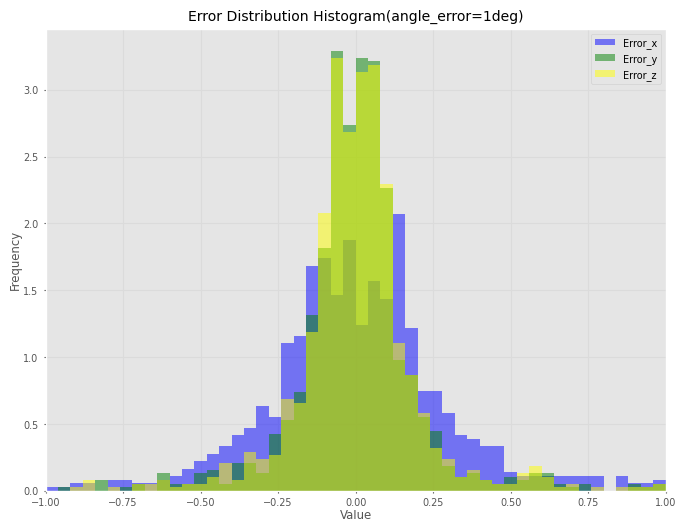

In [71]:
fig, ax = plt.subplots(figsize=(8, 6), facecolor='white')
# 绘制三个直方图
wid = 1
n1, bins2, patches2 = ax.hist(resList[:, 0], range=(-wid, wid), bins=50, density=True, alpha=0.5, color='blue')
n2, bins2, patches2 = ax.hist(resList[:, 1], range=(-wid, wid), bins=50, density=True, alpha=0.5, color='green')
n3, bins3, patches3 = ax.hist(resList[:, 2], range=(-wid, wid), bins=50, density=True, alpha=0.5, color='yellow')

# 设置坐标轴范围和标签
ax.set_xlim([-wid, wid])
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')

plt.title('Error Distribution Histogram(angle_error=1deg)')
ax.legend(['Error_x', 'Error_y', 'Error_z'])

plt.show()

In [72]:
print(np.var(resList[:, 0])/len(resList[:, 0]), np.var(resList[:, 1])/len(resList[:, 1]), np.var(resList[:, 2])/len(resList[:, 2]))

0.1928677215576172 0.03240476608276367 0.25196588134765624


In [74]:
RES_CLOUSE = {}
RES_CLOUSE['angle_error=1deg'] = resList

In [75]:
rounds = 1000
resList = []
for i in tqdm(range(rounds)):
    # print("\r", end="")
    # print("Download progress: {}%: ".format(i/10), "▋" * (i // 20), end="")
    # 带入数据
    # 注意：由于坐标系不同，所以误差的角标不加区分
    # 之前写的有BUG!!! 不能分别random，因为角标不加区分
    random_ratio1 = random.uniform(-1, 1)
    random_ratio2 = random.uniform(-1, 1)

    # 位置误差控制在0.001m以内
    displace_error = 0.001 * 5 * random_ratio1  # 百分之五的精度
    # 角度误差控制在1度，即0.017弧度以内
    angle_error = 0.017 * 2 * random_ratio2
    # 末端为吸盘端，认为主要的角度误差产生在z轴上
    angle_error_z = 0.017 * 2 * random_ratio2
    angle_error_x = 0.017 * 2 * random_ratio2
    angle_error_y = 0.017 * 2 * random_ratio2

    valueDic = {
        a1: 0, b1: 0, c1: 0,
        a2: 0, b2: 0, c2: 0,
        a3: 0, b3: 0, c3: 0,

        p_x: 0.1, p_y: 0.1, p_z: 0.1,
        
        e_x1: angle_error, e_y1: angle_error, e_z1: angle_error,
        e_x2: angle_error, e_y2: angle_error, e_z2: angle_error,
        e_x3: angle_error, e_y3: angle_error, e_z3: angle_error,
        e_x4: angle_error_x, e_y4: angle_error_y, 
        e_z4: 0,    # NOTE! e_z4已经被弃用!!! 设置为0！！！
        d_x1: displace_error, d_y1: displace_error, d_z1: displace_error,
        d_x2: displace_error, d_y2: displace_error, d_z2: displace_error,
        d_x3: displace_error, d_y3: displace_error, d_z3: displace_error,
        d_x4: displace_error, d_y4: displace_error, d_z4: displace_error,
        t_z: angle_error_z
    }

    subList = [
        (d_x1, valueDic[d_x1]), (d_y1, valueDic[d_y1]), (d_z1, valueDic[d_z1]),
        (d_x2, valueDic[d_x2]), (d_y2, valueDic[d_y2]), (d_z2, valueDic[d_z2]),
        (d_x3, valueDic[d_x3]), (d_y3, valueDic[d_y3]), (d_z3, valueDic[d_z3]),
        (d_x4, valueDic[d_x4]), (d_y4, valueDic[d_y4]), (d_z4, valueDic[d_z4]),
        (e_x1, valueDic[e_x1]), (e_y1, valueDic[e_y1]), (e_z1, valueDic[e_z1]),
        (e_x2, valueDic[e_x2]), (e_y2, valueDic[e_y2]), (e_z2, valueDic[e_z2]),
        (e_x3, valueDic[e_x3]), (e_y3, valueDic[e_y3]), (e_z3, valueDic[e_z3]),
        (e_x4, valueDic[e_x4]), (e_y4, valueDic[e_y4]), (e_z4, valueDic[e_z4]),
        (t_z, valueDic[t_z]),
        # 控制量
        (p_x, valueDic[p_x]), (p_y, valueDic[p_y]), (p_z, valueDic[p_z]),
        # 几何初始值（全部收缩在原点）
        (a1, 0), (b1, 0), (c1, 0),
        (a2, 0), (b2, 0), (c2, 0),
        (a3, 0), (b3, 0), (c3, 0),
    ]

    # 总体齐次变换矩阵
    T_4__0 = T_1__0.subs(subList) * T_2__1.subs(subList) * T_3__2.subs(subList) * T_4__3.subs(subList)

    P_inp = sp.Matrix([p_x, p_y, p_z, 1]).subs(subList)
    P_exp = P_inp.copy()
    P_list = [a1, b1, c1, a2, b2, c2, a3, b3, c3]
    for i in range(3):
        P_exp[i] += (P_list[i] + P_list[i+3] + P_list[i+6])
    P_exp = P_exp.subs(subList)   # 目标位置
    P_real = T_4__0 * P_inp
    # print(f"理论计算的最终位置为{P_real[0:3]}")
    # 计算误差
    P_err = P_real - P_exp
    # print(f"理论计算的误差为{P_err[0:3]}")
    x_theo_error, y_theo_error, z_theo_error = P_err[0], P_err[1], P_err[2]

    # Set value
    L1_error = [d_z1, d_x1, d_y1, e_z1, e_x1, e_y1]
    L2_error = [d_z2, d_x2, d_y2, e_z2, e_x2, e_y2]
    L3_error = [d_z3, d_x3, d_y3, e_z3, e_x3, e_y3]
    L4_error = [d_z4, d_x4, d_y4, t_z, e_x4, e_y4]  # 注意，e_z4已经被弃用
    paraList = [p_z] + L1_error + [p_x] + L2_error + [p_y] + L3_error + [e_z4] + L4_error

    expect_displacement = [valueDic[p_x]]+[0]*6+[valueDic[p_y]]+[0]*6+[valueDic[p_z]]+[0]*6+[0]+[0]*6
    # print(BZRobot.fkine(expect_displacement))   # 目标位置

    mat_sim_exp = BZRobot.fkine(expect_displacement).A

    # BZRobot.plot(expect_displacement);
    x_sim_exp = mat_sim_exp[0][3]
    y_sim_exp = mat_sim_exp[1][3]
    z_sim_exp = mat_sim_exp[2][3]
    # print(x_sim_exp, y_sim_exp, z_sim_exp)

    # 创造fkine对应的列表
    real_displacement = []
    for symbol in paraList:
        real_displacement.append(valueDic[symbol])

    # 计算
    mat_sim_real = BZRobot.fkine(real_displacement).A
    # BZRobot.plot(real_displacement);

    x_sim_real = mat_sim_real[0][3]
    y_sim_real = mat_sim_real[1][3]
    z_sim_real = mat_sim_real[2][3]
    # print(f"仿真计算的最终位置为{x_sim_real}, {y_sim_real}, {z_sim_real}")

    # precision = 5
    # 仿真得到的误差
    x_sim_error = x_sim_real - x_sim_exp
    y_sim_error = y_sim_real - y_sim_exp
    z_sim_error = z_sim_real - z_sim_exp
    # print(f"仿真计算的最终误差为{round(x_sim_error, precision)}, {round(y_sim_error, precision)}, {round(z_sim_error, precision)}")

    x_bias = (x_sim_error - x_theo_error)/x_theo_error
    y_bias = (y_sim_error - y_theo_error)/y_theo_error
    z_bias = (z_sim_error - z_theo_error)/z_theo_error
    # print(x_bias, y_bias, z_bias)
    resList.append((x_bias, y_bias, z_bias))

resList = np.array(resList, dtype=np.float32);

100%|██████████| 1000/1000 [01:32<00:00, 10.86it/s]


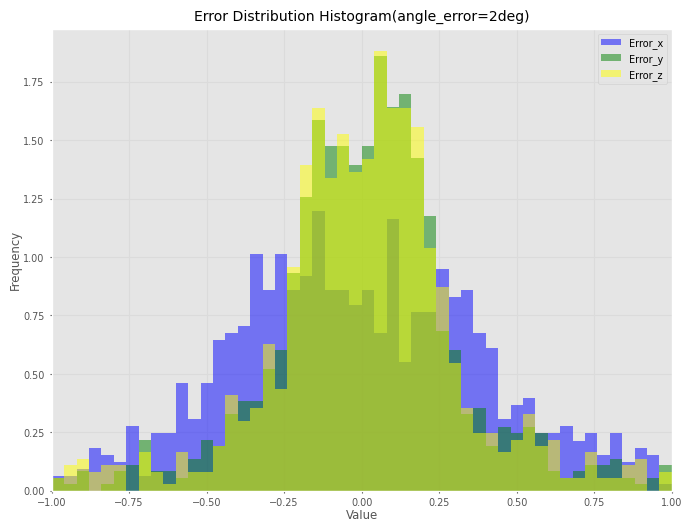

0.05174843597412109 0.006475456714630127 0.005497874259948731


In [76]:
fig, ax = plt.subplots(figsize=(8, 6), facecolor='white')
# 绘制三个直方图
wid = 1
n1, bins2, patches2 = ax.hist(resList[:, 0], range=(-wid, wid), bins=50, density=True, alpha=0.5, color='blue')
n2, bins2, patches2 = ax.hist(resList[:, 1], range=(-wid, wid), bins=50, density=True, alpha=0.5, color='green')
n3, bins3, patches3 = ax.hist(resList[:, 2], range=(-wid, wid), bins=50, density=True, alpha=0.5, color='yellow')

# 设置坐标轴范围和标签
ax.set_xlim([-wid, wid])
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')

plt.title('Error Distribution Histogram(angle_error=2deg)')
ax.legend(['Error_x', 'Error_y', 'Error_z'])

plt.show()
print(np.var(resList[:, 0])/len(resList[:, 0]), np.var(resList[:, 1])/len(resList[:, 1]), np.var(resList[:, 2])/len(resList[:, 2]))
RES_CLOUSE['angle_error=2deg'] = resList

In [77]:
rounds = 1000
resList = []
for i in tqdm(range(rounds)):
    # print("\r", end="")
    # print("Download progress: {}%: ".format(i/10), "▋" * (i // 20), end="")
    # 带入数据
    # 注意：由于坐标系不同，所以误差的角标不加区分
    # 之前写的有BUG!!! 不能分别random，因为角标不加区分
    random_ratio1 = random.uniform(-1, 1)
    random_ratio2 = random.uniform(-1, 1)

    # 位置误差控制在0.001m以内
    displace_error = 0.001 * 5 * random_ratio1  # 百分之五的精度
    # 角度误差控制在1度，即0.017弧度以内
    angle_error = 0.017 * 5 * random_ratio2
    # 末端为吸盘端，认为主要的角度误差产生在z轴上
    angle_error_z = 0.017 * 5 * random_ratio2
    angle_error_x = 0.017 * 5 * random_ratio2
    angle_error_y = 0.017 * 5 * random_ratio2

    valueDic = {
        a1: 0, b1: 0, c1: 0,
        a2: 0, b2: 0, c2: 0,
        a3: 0, b3: 0, c3: 0,

        p_x: 0.1, p_y: 0.1, p_z: 0.1,
        
        e_x1: angle_error, e_y1: angle_error, e_z1: angle_error,
        e_x2: angle_error, e_y2: angle_error, e_z2: angle_error,
        e_x3: angle_error, e_y3: angle_error, e_z3: angle_error,
        e_x4: angle_error_x, e_y4: angle_error_y, 
        e_z4: 0,    # NOTE! e_z4已经被弃用!!! 设置为0！！！
        d_x1: displace_error, d_y1: displace_error, d_z1: displace_error,
        d_x2: displace_error, d_y2: displace_error, d_z2: displace_error,
        d_x3: displace_error, d_y3: displace_error, d_z3: displace_error,
        d_x4: displace_error, d_y4: displace_error, d_z4: displace_error,
        t_z: angle_error_z
    }

    subList = [
        (d_x1, valueDic[d_x1]), (d_y1, valueDic[d_y1]), (d_z1, valueDic[d_z1]),
        (d_x2, valueDic[d_x2]), (d_y2, valueDic[d_y2]), (d_z2, valueDic[d_z2]),
        (d_x3, valueDic[d_x3]), (d_y3, valueDic[d_y3]), (d_z3, valueDic[d_z3]),
        (d_x4, valueDic[d_x4]), (d_y4, valueDic[d_y4]), (d_z4, valueDic[d_z4]),
        (e_x1, valueDic[e_x1]), (e_y1, valueDic[e_y1]), (e_z1, valueDic[e_z1]),
        (e_x2, valueDic[e_x2]), (e_y2, valueDic[e_y2]), (e_z2, valueDic[e_z2]),
        (e_x3, valueDic[e_x3]), (e_y3, valueDic[e_y3]), (e_z3, valueDic[e_z3]),
        (e_x4, valueDic[e_x4]), (e_y4, valueDic[e_y4]), (e_z4, valueDic[e_z4]),
        (t_z, valueDic[t_z]),
        # 控制量
        (p_x, valueDic[p_x]), (p_y, valueDic[p_y]), (p_z, valueDic[p_z]),
        # 几何初始值（全部收缩在原点）
        (a1, 0), (b1, 0), (c1, 0),
        (a2, 0), (b2, 0), (c2, 0),
        (a3, 0), (b3, 0), (c3, 0),
    ]

    # 总体齐次变换矩阵
    T_4__0 = T_1__0.subs(subList) * T_2__1.subs(subList) * T_3__2.subs(subList) * T_4__3.subs(subList)

    P_inp = sp.Matrix([p_x, p_y, p_z, 1]).subs(subList)
    P_exp = P_inp.copy()
    P_list = [a1, b1, c1, a2, b2, c2, a3, b3, c3]
    for i in range(3):
        P_exp[i] += (P_list[i] + P_list[i+3] + P_list[i+6])
    P_exp = P_exp.subs(subList)   # 目标位置
    P_real = T_4__0 * P_inp
    # print(f"理论计算的最终位置为{P_real[0:3]}")
    # 计算误差
    P_err = P_real - P_exp
    # print(f"理论计算的误差为{P_err[0:3]}")
    x_theo_error, y_theo_error, z_theo_error = P_err[0], P_err[1], P_err[2]

    # Set value
    L1_error = [d_z1, d_x1, d_y1, e_z1, e_x1, e_y1]
    L2_error = [d_z2, d_x2, d_y2, e_z2, e_x2, e_y2]
    L3_error = [d_z3, d_x3, d_y3, e_z3, e_x3, e_y3]
    L4_error = [d_z4, d_x4, d_y4, t_z, e_x4, e_y4]  # 注意，e_z4已经被弃用
    paraList = [p_z] + L1_error + [p_x] + L2_error + [p_y] + L3_error + [e_z4] + L4_error

    expect_displacement = [valueDic[p_x]]+[0]*6+[valueDic[p_y]]+[0]*6+[valueDic[p_z]]+[0]*6+[0]+[0]*6
    # print(BZRobot.fkine(expect_displacement))   # 目标位置

    mat_sim_exp = BZRobot.fkine(expect_displacement).A

    # BZRobot.plot(expect_displacement);
    x_sim_exp = mat_sim_exp[0][3]
    y_sim_exp = mat_sim_exp[1][3]
    z_sim_exp = mat_sim_exp[2][3]
    # print(x_sim_exp, y_sim_exp, z_sim_exp)

    # 创造fkine对应的列表
    real_displacement = []
    for symbol in paraList:
        real_displacement.append(valueDic[symbol])

    # 计算
    mat_sim_real = BZRobot.fkine(real_displacement).A
    # BZRobot.plot(real_displacement);

    x_sim_real = mat_sim_real[0][3]
    y_sim_real = mat_sim_real[1][3]
    z_sim_real = mat_sim_real[2][3]
    # print(f"仿真计算的最终位置为{x_sim_real}, {y_sim_real}, {z_sim_real}")

    # precision = 5
    # 仿真得到的误差
    x_sim_error = x_sim_real - x_sim_exp
    y_sim_error = y_sim_real - y_sim_exp
    z_sim_error = z_sim_real - z_sim_exp
    # print(f"仿真计算的最终误差为{round(x_sim_error, precision)}, {round(y_sim_error, precision)}, {round(z_sim_error, precision)}")

    x_bias = (x_sim_error - x_theo_error)/x_theo_error
    y_bias = (y_sim_error - y_theo_error)/y_theo_error
    z_bias = (z_sim_error - z_theo_error)/z_theo_error
    # print(x_bias, y_bias, z_bias)
    resList.append((x_bias, y_bias, z_bias))

resList = np.array(resList, dtype=np.float32);

100%|██████████| 1000/1000 [01:27<00:00, 11.40it/s]


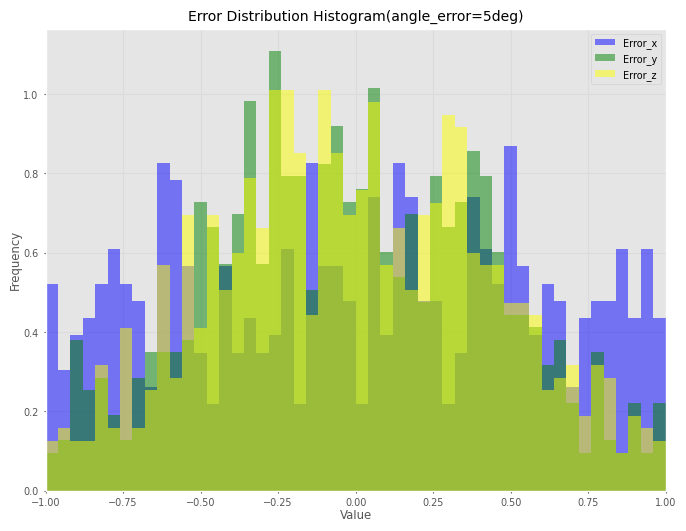

87.129640625 0.07812257385253907 0.029988492965698242


In [78]:
fig, ax = plt.subplots(figsize=(8, 6), facecolor='white')
# 绘制三个直方图
wid = 1
n1, bins2, patches2 = ax.hist(resList[:, 0], range=(-wid, wid), bins=50, density=True, alpha=0.5, color='blue')
n2, bins2, patches2 = ax.hist(resList[:, 1], range=(-wid, wid), bins=50, density=True, alpha=0.5, color='green')
n3, bins3, patches3 = ax.hist(resList[:, 2], range=(-wid, wid), bins=50, density=True, alpha=0.5, color='yellow')

# 设置坐标轴范围和标签
ax.set_xlim([-wid, wid])
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')

plt.title('Error Distribution Histogram(angle_error=5deg)')
ax.legend(['Error_x', 'Error_y', 'Error_z'])

plt.show()
print(np.var(resList[:, 0])/len(resList[:, 0]), np.var(resList[:, 1])/len(resList[:, 1]), np.var(resList[:, 2])/len(resList[:, 2]))
RES_CLOUSE['angle_error=5deg'] = resList

In [79]:
rounds = 1000
resList = []
for i in tqdm(range(rounds)):
    # print("\r", end="")
    # print("Download progress: {}%: ".format(i/10), "▋" * (i // 20), end="")
    # 带入数据
    # 注意：由于坐标系不同，所以误差的角标不加区分
    # 之前写的有BUG!!! 不能分别random，因为角标不加区分
    random_ratio1 = random.uniform(-1, 1)
    random_ratio2 = random.uniform(-1, 1)

    # 位置误差控制在0.001m以内
    displace_error = 0.001 * 5 * random_ratio1  # 百分之五的精度
    # 角度误差控制在1度，即0.017弧度以内
    angle_error = 0.017 * 0.1 * random_ratio2
    # 末端为吸盘端，认为主要的角度误差产生在z轴上
    angle_error_z = 0.017 * 0.1 * random_ratio2
    angle_error_x = 0.017 * 0.1 * random_ratio2
    angle_error_y = 0.017 * 0.1 * random_ratio2

    valueDic = {
        a1: 0, b1: 0, c1: 0,
        a2: 0, b2: 0, c2: 0,
        a3: 0, b3: 0, c3: 0,

        p_x: 0.1, p_y: 0.1, p_z: 0.1,
        
        e_x1: angle_error, e_y1: angle_error, e_z1: angle_error,
        e_x2: angle_error, e_y2: angle_error, e_z2: angle_error,
        e_x3: angle_error, e_y3: angle_error, e_z3: angle_error,
        e_x4: angle_error_x, e_y4: angle_error_y, 
        e_z4: 0,    # NOTE! e_z4已经被弃用!!! 设置为0！！！
        d_x1: displace_error, d_y1: displace_error, d_z1: displace_error,
        d_x2: displace_error, d_y2: displace_error, d_z2: displace_error,
        d_x3: displace_error, d_y3: displace_error, d_z3: displace_error,
        d_x4: displace_error, d_y4: displace_error, d_z4: displace_error,
        t_z: angle_error_z
    }

    subList = [
        (d_x1, valueDic[d_x1]), (d_y1, valueDic[d_y1]), (d_z1, valueDic[d_z1]),
        (d_x2, valueDic[d_x2]), (d_y2, valueDic[d_y2]), (d_z2, valueDic[d_z2]),
        (d_x3, valueDic[d_x3]), (d_y3, valueDic[d_y3]), (d_z3, valueDic[d_z3]),
        (d_x4, valueDic[d_x4]), (d_y4, valueDic[d_y4]), (d_z4, valueDic[d_z4]),
        (e_x1, valueDic[e_x1]), (e_y1, valueDic[e_y1]), (e_z1, valueDic[e_z1]),
        (e_x2, valueDic[e_x2]), (e_y2, valueDic[e_y2]), (e_z2, valueDic[e_z2]),
        (e_x3, valueDic[e_x3]), (e_y3, valueDic[e_y3]), (e_z3, valueDic[e_z3]),
        (e_x4, valueDic[e_x4]), (e_y4, valueDic[e_y4]), (e_z4, valueDic[e_z4]),
        (t_z, valueDic[t_z]),
        # 控制量
        (p_x, valueDic[p_x]), (p_y, valueDic[p_y]), (p_z, valueDic[p_z]),
        # 几何初始值（全部收缩在原点）
        (a1, 0), (b1, 0), (c1, 0),
        (a2, 0), (b2, 0), (c2, 0),
        (a3, 0), (b3, 0), (c3, 0),
    ]

    # 总体齐次变换矩阵
    T_4__0 = T_1__0.subs(subList) * T_2__1.subs(subList) * T_3__2.subs(subList) * T_4__3.subs(subList)

    P_inp = sp.Matrix([p_x, p_y, p_z, 1]).subs(subList)
    P_exp = P_inp.copy()
    P_list = [a1, b1, c1, a2, b2, c2, a3, b3, c3]
    for i in range(3):
        P_exp[i] += (P_list[i] + P_list[i+3] + P_list[i+6])
    P_exp = P_exp.subs(subList)   # 目标位置
    P_real = T_4__0 * P_inp
    # print(f"理论计算的最终位置为{P_real[0:3]}")
    # 计算误差
    P_err = P_real - P_exp
    # print(f"理论计算的误差为{P_err[0:3]}")
    x_theo_error, y_theo_error, z_theo_error = P_err[0], P_err[1], P_err[2]

    # Set value
    L1_error = [d_z1, d_x1, d_y1, e_z1, e_x1, e_y1]
    L2_error = [d_z2, d_x2, d_y2, e_z2, e_x2, e_y2]
    L3_error = [d_z3, d_x3, d_y3, e_z3, e_x3, e_y3]
    L4_error = [d_z4, d_x4, d_y4, t_z, e_x4, e_y4]  # 注意，e_z4已经被弃用
    paraList = [p_z] + L1_error + [p_x] + L2_error + [p_y] + L3_error + [e_z4] + L4_error

    expect_displacement = [valueDic[p_x]]+[0]*6+[valueDic[p_y]]+[0]*6+[valueDic[p_z]]+[0]*6+[0]+[0]*6
    # print(BZRobot.fkine(expect_displacement))   # 目标位置

    mat_sim_exp = BZRobot.fkine(expect_displacement).A

    # BZRobot.plot(expect_displacement);
    x_sim_exp = mat_sim_exp[0][3]
    y_sim_exp = mat_sim_exp[1][3]
    z_sim_exp = mat_sim_exp[2][3]
    # print(x_sim_exp, y_sim_exp, z_sim_exp)

    # 创造fkine对应的列表
    real_displacement = []
    for symbol in paraList:
        real_displacement.append(valueDic[symbol])

    # 计算
    mat_sim_real = BZRobot.fkine(real_displacement).A
    # BZRobot.plot(real_displacement);

    x_sim_real = mat_sim_real[0][3]
    y_sim_real = mat_sim_real[1][3]
    z_sim_real = mat_sim_real[2][3]
    # print(f"仿真计算的最终位置为{x_sim_real}, {y_sim_real}, {z_sim_real}")

    # precision = 5
    # 仿真得到的误差
    x_sim_error = x_sim_real - x_sim_exp
    y_sim_error = y_sim_real - y_sim_exp
    z_sim_error = z_sim_real - z_sim_exp
    # print(f"仿真计算的最终误差为{round(x_sim_error, precision)}, {round(y_sim_error, precision)}, {round(z_sim_error, precision)}")

    x_bias = (x_sim_error - x_theo_error)/x_theo_error
    y_bias = (y_sim_error - y_theo_error)/y_theo_error
    z_bias = (z_sim_error - z_theo_error)/z_theo_error
    # print(x_bias, y_bias, z_bias)
    resList.append((x_bias, y_bias, z_bias))

resList = np.array(resList, dtype=np.float32);

100%|██████████| 1000/1000 [01:27<00:00, 11.46it/s]


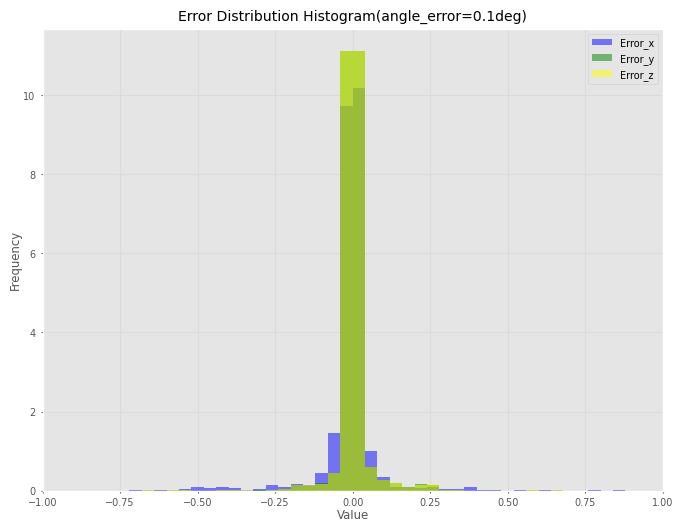

7.09318220615387e-05 1.770617999136448e-05 1.795804686844349e-05


In [80]:
fig, ax = plt.subplots(figsize=(8, 6), facecolor='white')
# 绘制三个直方图
wid = 1
n1, bins2, patches2 = ax.hist(resList[:, 0], range=(-wid, wid), bins=50, density=True, alpha=0.5, color='blue')
n2, bins2, patches2 = ax.hist(resList[:, 1], range=(-wid, wid), bins=50, density=True, alpha=0.5, color='green')
n3, bins3, patches3 = ax.hist(resList[:, 2], range=(-wid, wid), bins=50, density=True, alpha=0.5, color='yellow')

# 设置坐标轴范围和标签
ax.set_xlim([-wid, wid])
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')

plt.title('Error Distribution Histogram(angle_error=0.1deg)')
ax.legend(['Error_x', 'Error_y', 'Error_z'])

plt.show()
print(np.var(resList[:, 0])/len(resList[:, 0]), np.var(resList[:, 1])/len(resList[:, 1]), np.var(resList[:, 2])/len(resList[:, 2]))
RES_CLOUSE['angle_error=0.1deg'] = resList

In [81]:
resList_01 = RES_CLOUSE['angle_error=0.1deg']
resList_1 = RES_CLOUSE['angle_error=1deg']
resList_2 = RES_CLOUSE['angle_error=2deg']
resList_5 = RES_CLOUSE['angle_error=5deg']

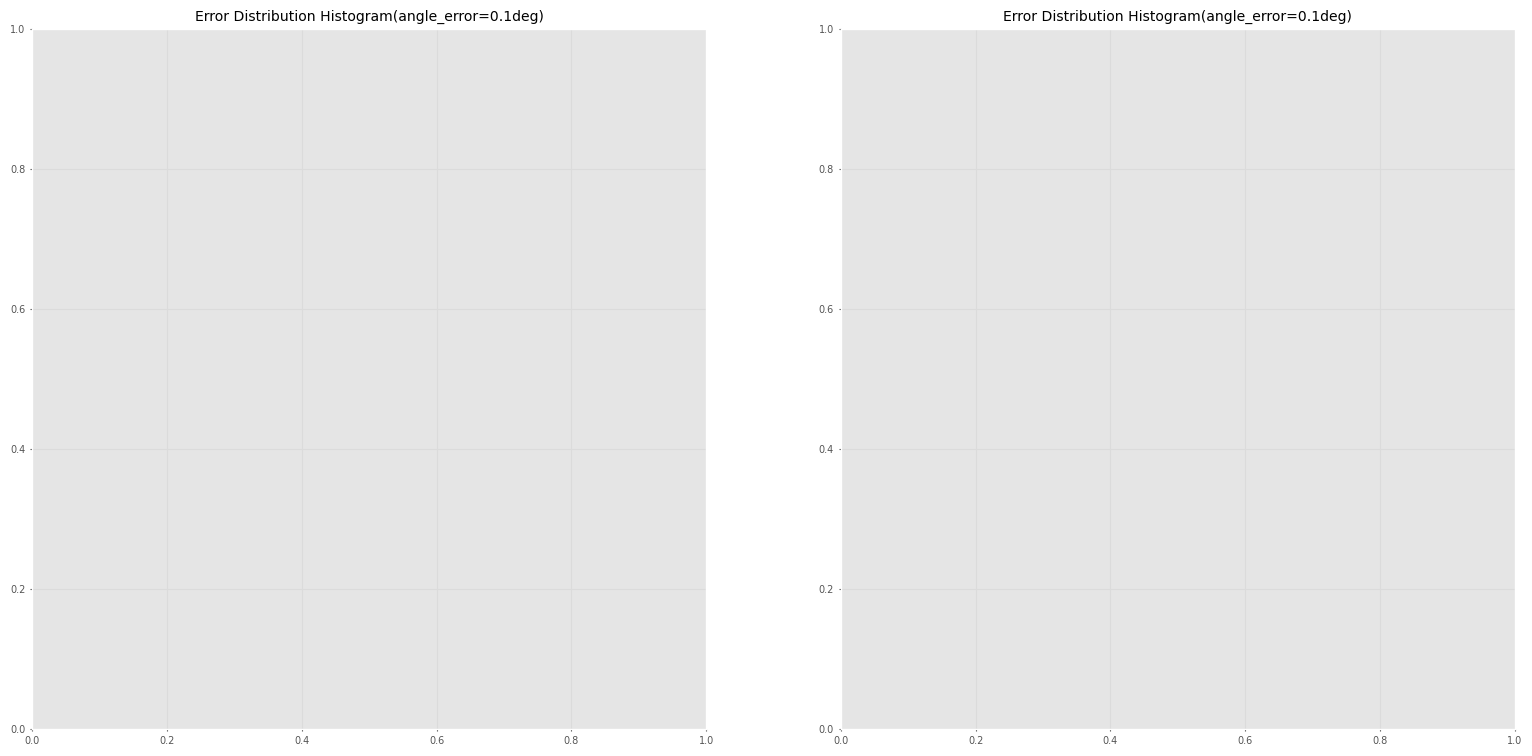

In [95]:
fig, ax = plt.subplots(figsize=(40, 20), facecolor='white')
plt.subplot(2, 4, 1)
n1, bins2, patches2 = ax.hist(resList_01[:, 0], range=(-wid, wid), bins=50, density=True, alpha=0.5, color='blue')
n2, bins2, patches2 = ax.hist(resList_01[:, 1], range=(-wid, wid), bins=50, density=True, alpha=0.5, color='green')
n3, bins3, patches3 = ax.hist(resList_01[:, 2], range=(-wid, wid), bins=50, density=True, alpha=0.5, color='yellow')

plt.title('Error Distribution Histogram(angle_error=0.1deg)')

plt.subplot(2, 4, 2)
n4, bins4, patches4 = ax.hist(resList_1[:, 0], range=(-wid, wid), bins=50, density=True, alpha=0.5, color='blue')
n5, bins5, patches5 = ax.hist(resList_1[:, 1], range=(-wid, wid), bins=50, density=True, alpha=0.5, color='green')
n6, bins6, patches6 = ax.hist(resList_1[:, 2], range=(-wid, wid), bins=50, density=True, alpha=0.5, color='yellow')
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')

plt.title('Error Distribution Histogram(angle_error=0.1deg)')

plt.show()